In [1]:
CrimeData = read.csv("NYPD_Complaint_Data_Current__Year_To_Date_.csv")

In [2]:
library(plyr)
library(ggplot2)

Warning message:
"package 'plyr' was built under R version 3.6.3"
Warning message:
"package 'ggplot2' was built under R version 3.6.3"


In [3]:
CD <- data.frame(CrimeData)
#head(CD)

CD$ADDR_PCT_CD <- as.factor(CD$ADDR_PCT_CD)

In [4]:
#sapply(CD, class)

## Dataset Challenges

#### 1.  Factor data represented as Integer.  
Examples: ADDR_PCT_CD is a numeric value representing specific precincts.  This column should be converted to a factor.

#### 2. Tightly encoded data.
Too much data in the dataset is presented as factor data.

Example: RPT_DT is a field containing date a crime was reported in the numeric Month/Day/Year format, such as 08/28/202.  As such, this field provide rich information a classifier or clustering algorithm can use.  A better way to represent this data is as a sparse binary matrix, containing 0 and 1s as potential responses.

July | August | Sept

Monday | Tuesday | Wednesday



## Subdividing Dataset into:
#### Crimes Against Business/Organizations
#### Crimes Against People of NY State
#### Crimes Against Persons

In [5]:
CrimesAgainstBusiness    <- CD[CD$VIC_SEX == 'D',]

CrimesAgainstPeopleOfNYS <- CD[CD$VIC_SEX == 'E',]

CrimesAgainstPersons     <- CD[CD$VIC_SEX == 'F' | CD$VIC_SEX == 'F',]

## Crimes against People of NY State Overview

In [6]:
# HELPER VARIABLES

# p variable is a breakdown of crimes per precinct
p = as.data.frame(count(CrimesAgainstPeopleOfNYS$ADDR_PCT_CD))

# p_median is median crime per precinct
p_median   = median(p$freq)

# p_num_prec = total number of precincts reporting crimes
p_num_prec = nrow(p)

# total_crimes - total crimes reported citywide
total_crimes = nrow(CrimesAgainstPeopleOfNYS)

# Top 10 precincts
top_pct = head(sort(summary(CrimesAgainstPeopleOfNYS$ADDR_PCT_CD), decreasing=TRUE), n = 10)


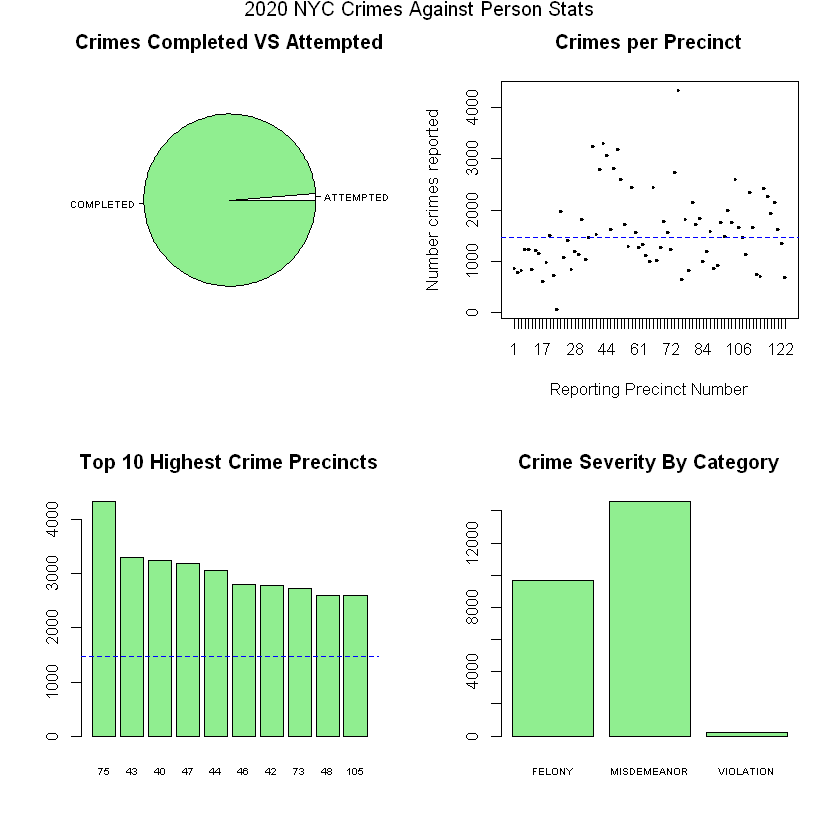

In [54]:
par(mfrow=c(2,2))

pie(summary(CrimesAgainstPeopleOfNYS$CRM_ATPT_CPTD_CD), main= "Crimes Completed VS Attempted", col=c("white","lightgreen"), cex = 0.6)

plot(p$x, p$freq, xlab = "Reporting Precinct Number", ylab = "Number crimes reported", cex.names = 1, col='lightgreen', main ="Crimes per Precinct")
abline(h=p_median, col = "blue", lty=2)

barplot(top_pct, cex.names = 0.6, col='lightgreen', main = "Top 10 Highest Crime Precincts")
abline(h=p_median, col = "blue", lty=2)

barplot(summary(CrimesAgainstPeopleOfNYS$LAW_CAT_CD), col='lightgreen', cex.names = 0.6, main = "Crime Severity By Category")

mtext("2020 NYC Crimes Against Person Stats", side=3, outer=TRUE, line=-1)


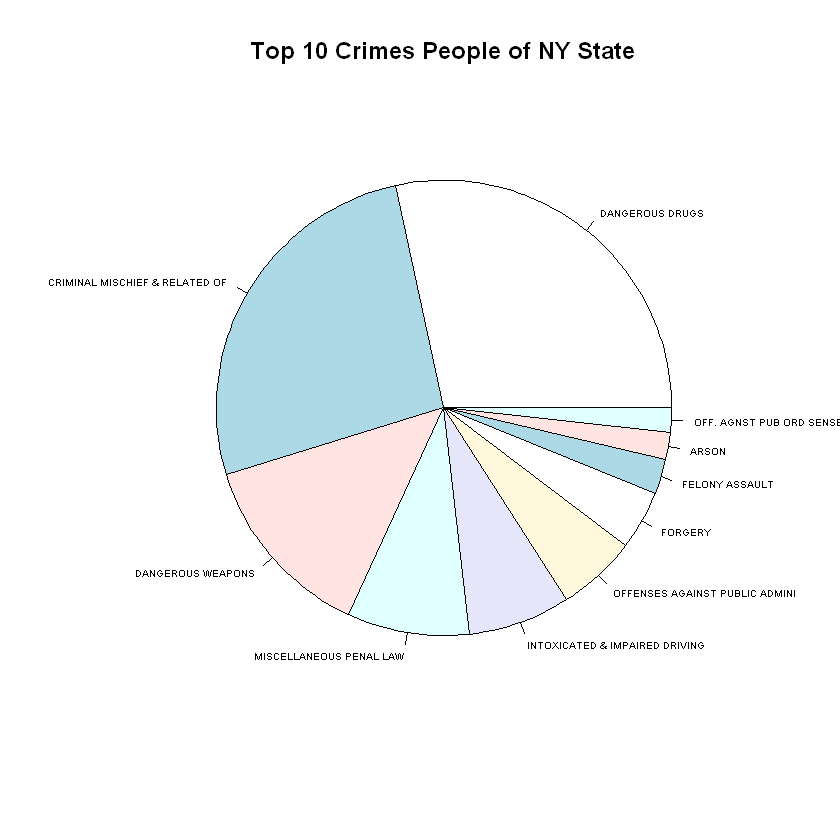

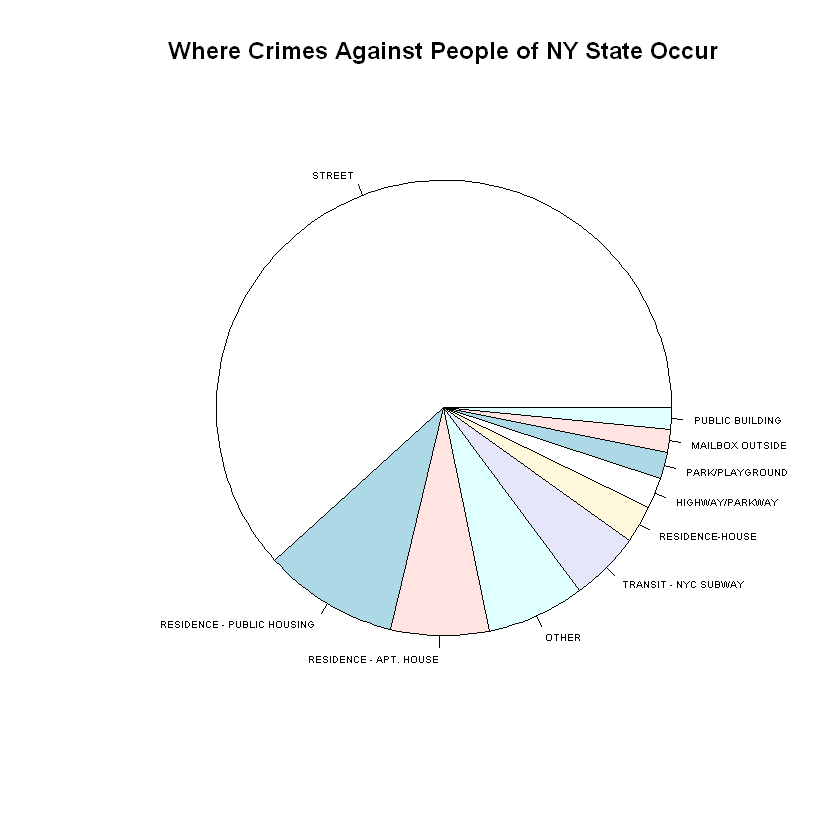

In [8]:
top_crimes      = head(sort(summary(CrimesAgainstPeopleOfNYS$OFNS_DESC), decreasing=TRUE), n = 10)
pie(top_crimes, main = "Top 10 Crimes People of NY State",     cex = 0.5)

bad_spots           = head(sort(summary(CrimesAgainstPeopleOfNYS$PREM_TYP_DESC), decreasing=TRUE), n = 10)                          
pie(bad_spots, main = "Where Crimes Against People of NY State Occur",     cex = 0.5)

## Crimes against Business and Organizations

In [9]:
# HELPER VARIABLES

# p variable is a breakdown of crimes per precinct
p = as.data.frame(count(CrimesAgainstBusiness$ADDR_PCT_CD))

# p_median is median crime per precinct
p_median   = median(p$freq)

# p_num_prec = total number of precincts reporting crimes
p_num_prec = nrow(p)

# total_crimes - total crimes reported citywide
total_crimes = nrow(CrimesAgainstBusiness)

# Top 10 precincts
top_pct = head(sort(summary(CrimesAgainstBusiness$ADDR_PCT_CD), decreasing=TRUE), n = 10)

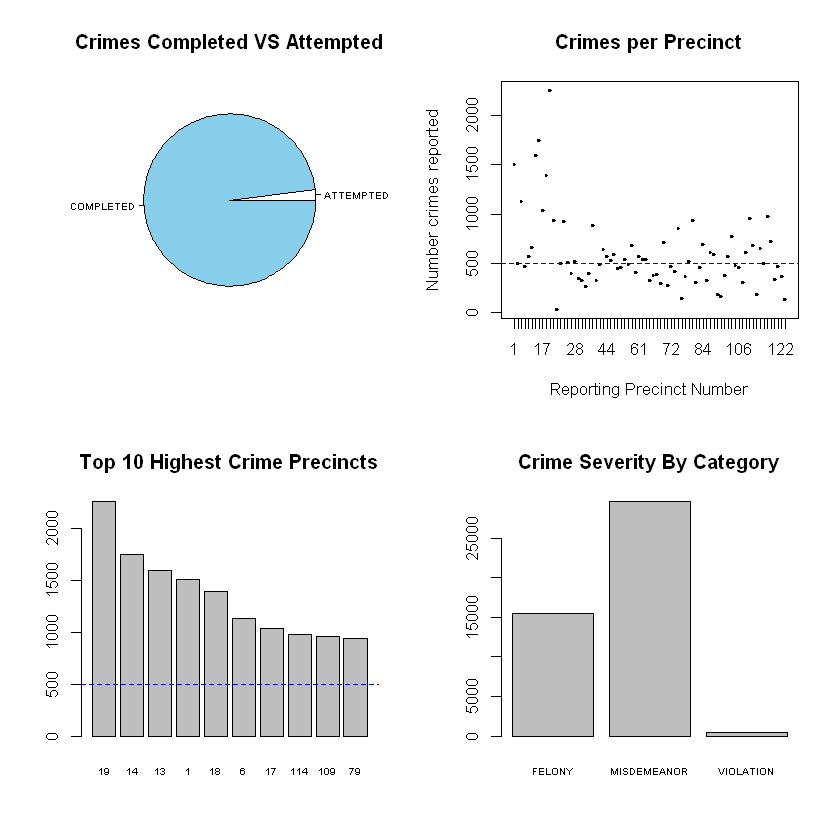

In [10]:
par(mfrow=c(2,2))

pie(summary(CrimesAgainstBusiness$CRM_ATPT_CPTD_CD), main= "Crimes Completed VS Attempted", col=c("white","skyblue"), cex = 0.6)

plot(p$x, p$freq, xlab = "Reporting Precinct Number", ylab = "Number crimes reported", col="blue", main ="Crimes per Precinct")
abline(h=p_median, col = "blue", lty=2)

barplot(top_pct, cex.names = 0.6, main = "Top 10 Highest Crime Precincts")
abline(h=p_median, col = "blue", lty=2)

barplot(summary(CrimesAgainstBusiness$LAW_CAT_CD), cex.names = 0.6, main = "Crime Severity By Category")

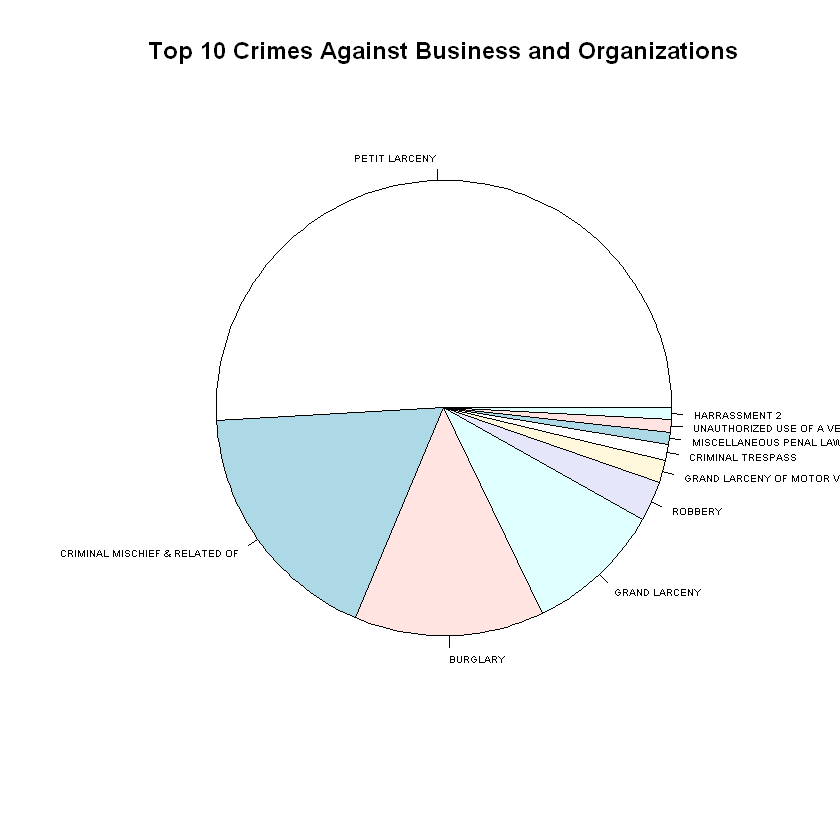

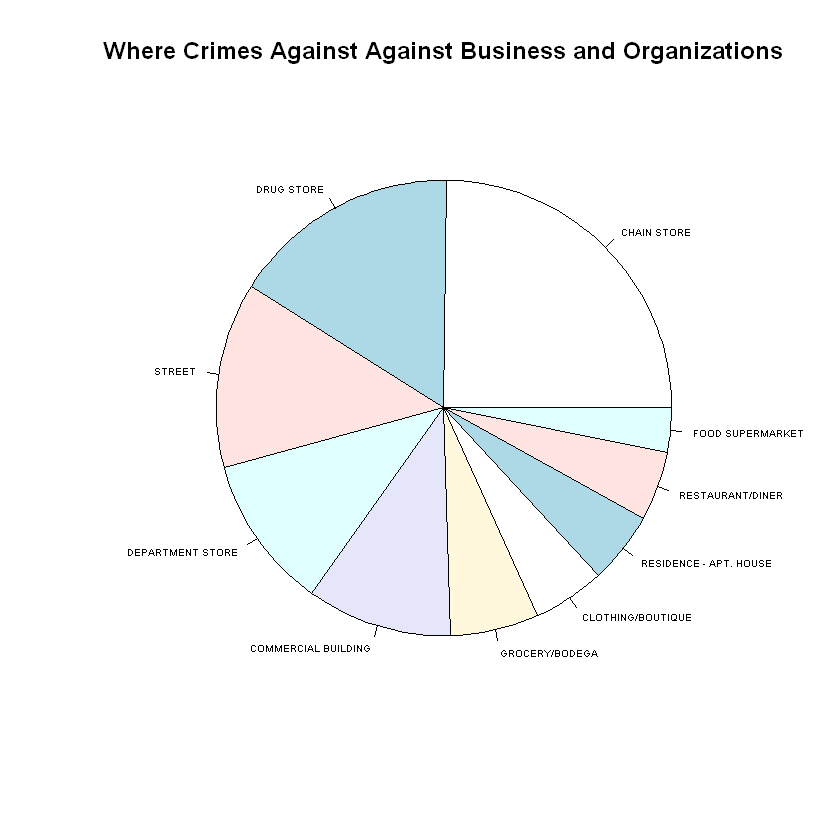

In [11]:
top_crimes      = head(sort(summary(CrimesAgainstBusiness$OFNS_DESC), decreasing=TRUE), n = 10)
pie(top_crimes, main = "Top 10 Crimes Against Business and Organizations",     cex = 0.5)

bad_spots           = head(sort(summary(CrimesAgainstBusiness$PREM_TYP_DESC), decreasing=TRUE), n = 10)                          
pie(bad_spots, main = "Where Crimes Against Against Business and Organizations",     cex = 0.5)

## Crimes Against Persons 

In [12]:
# HELPER VARIABLES

# p variable is a breakdown of crimes per precinct
p = as.data.frame(count(CrimesAgainstPersons$ADDR_PCT_CD))

# p_median is median crime per precinct
p_median   = median(p$freq)

# p_num_prec = total number of precincts reporting crimes
p_num_prec = nrow(p)

# total_crimes - total crimes reported citywide
total_crimes = nrow(CrimesAgainstPersons)

# Top 10 precincts
top_pct = head(sort(summary(CrimesAgainstPersons$ADDR_PCT_CD), decreasing=TRUE), n = 10)

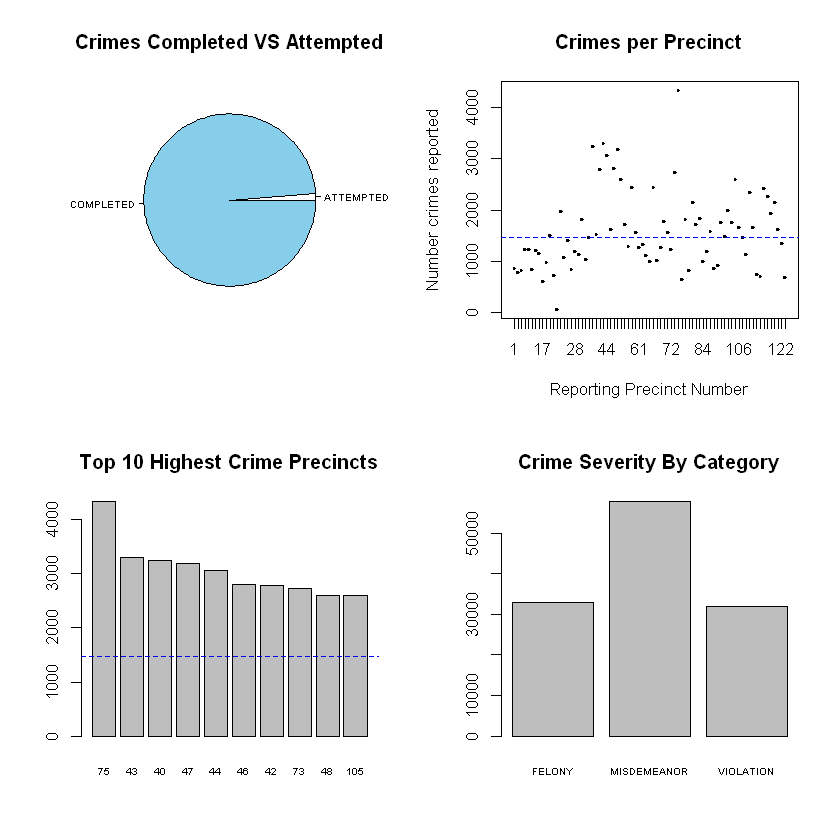

In [13]:
par(mfrow=c(2,2))

pie(summary(CrimesAgainstPersons$CRM_ATPT_CPTD_CD), main= "Crimes Completed VS Attempted", col=c("white","skyblue"), cex = 0.6)

plot(p$x, p$freq, xlab = "Reporting Precinct Number", ylab = "Number crimes reported", col="blue", main ="Crimes per Precinct")
abline(h=p_median, col = "blue", lty=2)

barplot(top_pct, cex.names = 0.6, main = "Top 10 Highest Crime Precincts")
abline(h=p_median, col = "blue", lty=2)

barplot(summary(CrimesAgainstPersons$LAW_CAT_CD), cex.names = 0.6, main = "Crime Severity By Category")

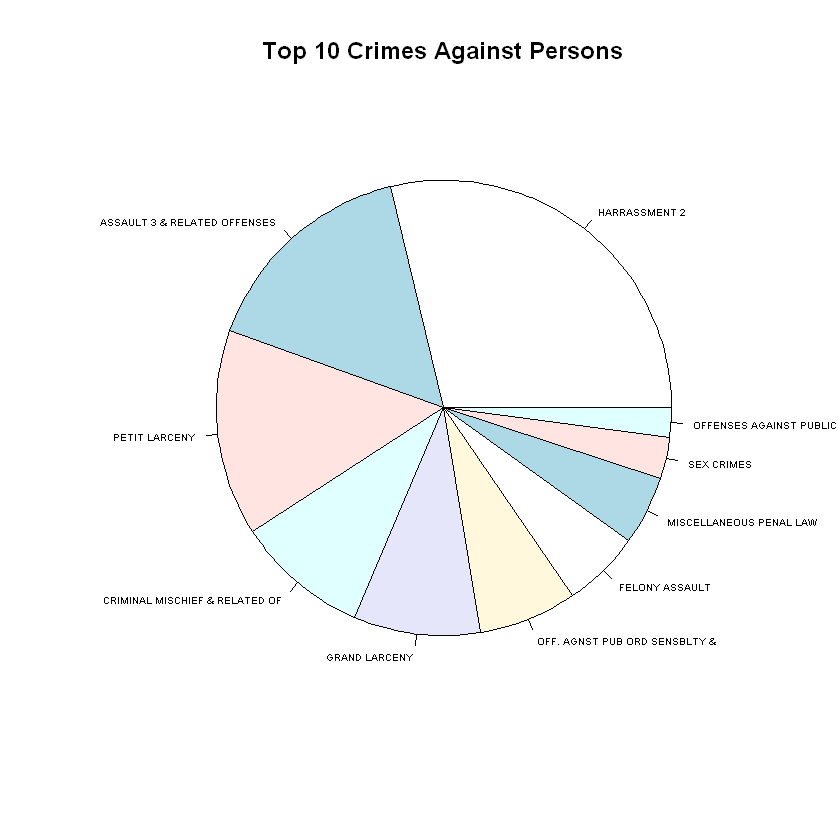

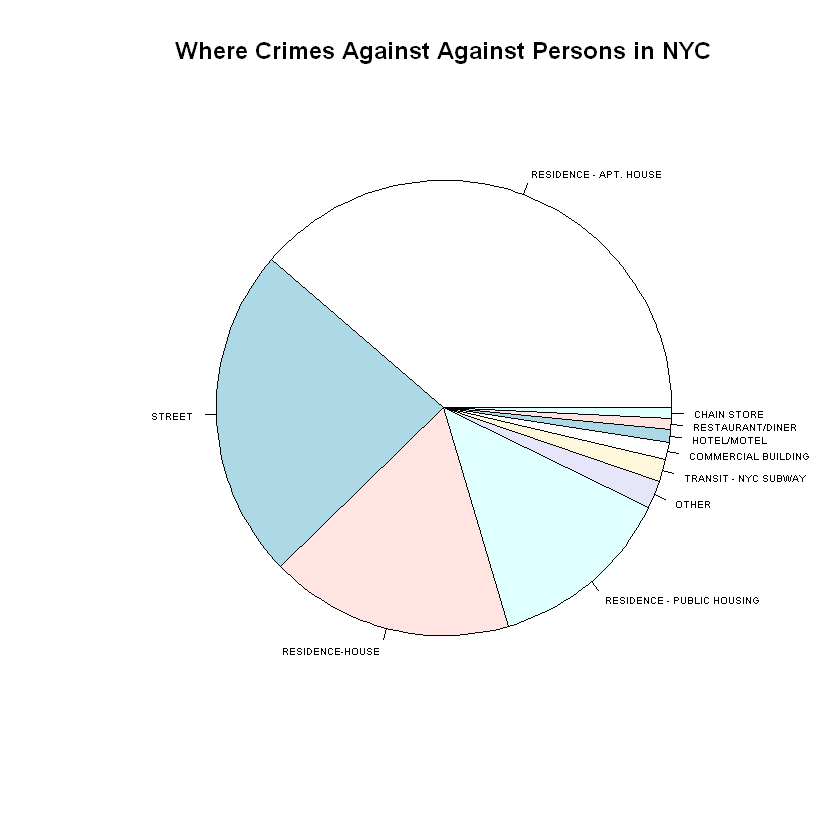

In [14]:
top_crimes      = head(sort(summary(CrimesAgainstPersons$OFNS_DESC), decreasing=TRUE), n = 10)
pie(top_crimes, main = "Top 10 Crimes Against Persons",     cex = 0.5)

bad_spots           = head(sort(summary(CrimesAgainstPersons$PREM_TYP_DESC), decreasing=TRUE), n = 10)                          
pie(bad_spots, main = "Where Crimes Against Against Persons in NYC",     cex = 0.5)

In [15]:
T <- data.frame(
    OffenseDesc     = CD$OFNS_DESC,
    VicSex          = CD$VIC_SEX,
    VicRace         = CD$VIC_RACE
)

In [16]:
# Raw data
tail(T, n = 25)

,OffenseDesc,VicSex,VicRace
,<fct>,<fct>,<fct>
306632,FELONY ASSAULT,M,WHITE HISPANIC
306633,ASSAULT 3 & RELATED OFFENSES,F,WHITE HISPANIC
306634,MISCELLANEOUS PENAL LAW,F,BLACK
306635,MISCELLANEOUS PENAL LAW,E,UNKNOWN
306636,NYS LAWS-UNCLASSIFIED FELONY,E,UNKNOWN
306637,ASSAULT 3 & RELATED OFFENSES,F,BLACK
306638,GRAND LARCENY,F,WHITE
306639,GRAND LARCENY,F,WHITE
306640,ASSAULT 3 & RELATED OFFENSES,M,ASIAN / PACIFIC ISLANDER


In [17]:
# Victim Profile Encoding

VIC_SEX_M          = ifelse(T$VicSex == "M", 1,0)
VIC_SEX_F          = ifelse(T$VicSex == "F", 1,0)
VIC_BizOrg         = ifelse(T$VicSex == "D", 1,0)
VIC_PPLOfNYS       = ifelse(T$VicSex == "E", 1,0)

VIC_Black       = ifelse(T$VicRace == "BLACK", 1,0)
VIC_BlackHisp   = ifelse(T$VicRace == "BLACK HISPANIC", 1,0)
VIC_White       = ifelse(T$VicRace == "WHITE", 1,0)
VIC_WhiteHisp   = ifelse(T$VicRace == "WHITE HISPANIC", 1,0)
VIC_Unknown     = ifelse(T$VicRace == "UNKNOWN", 1,0)
VIC_Asian       = ifelse(T$VicRace == "ASIAN / PACIFIC ISLANDER", 1,0)

In [18]:
# Crime Information Encoding

PETIT_LARCENY  = ifelse(T$OffenseDesc == "PETIT LARCENY", 1,0)
#HARRASSMENT    = ifelse(T$OffenseDesc == "HARRASSMENT", 1,0)

In [19]:
# Adding new columns to the dataframe

# Crime Information

T$PETIT_LARCENY = PETIT_LARCENY
#T$HARRASSMENT   = HARRASSMENT

# Victim Data
T$VIC_Sex_M        = VIC_SEX_M
T$VIC_Sex_F        = VIC_SEX_F
T$VIC_BizOrg       = VIC_SEX_D
T$VIC_PPLOfNYS     = VIC_SEX_E

T$VIC_Black     = VIC_Black
T$VIC_BlackHisp = VIC_BlackHisp
T$VIC_White     = VIC_White
T$VIC_WhiteHisp = VIC_WhiteHisp
T$VIC_Unknown   = VIC_Unknown
T$VIC_Asian     = VIC_Asian


# Removing Decoded Columns
T$VicRace      <- NULL
T$VicSex       <- NULL
T$OffenseDesc  <- NULL

ERROR: Error in eval(expr, envir, enclos): object 'VIC_SEX_D' not found


In [ ]:
# data after encoding
tail(T, n = 200)